Classification with Python

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

### Load Data From CSV File  

In [2]:
X = pd.read_csv('Student_performance_data-sample.csv')
                
X.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
X.shape

(271, 15)

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          271 non-null    int64  
 1   Age                271 non-null    int64  
 2   Gender             271 non-null    int64  
 3   Ethnicity          271 non-null    int64  
 4   ParentalEducation  271 non-null    int64  
 5   StudyTimeWeekly    271 non-null    float64
 6   Absences           271 non-null    int64  
 7   Tutoring           271 non-null    int64  
 8   ParentalSupport    271 non-null    int64  
 9   Extracurricular    271 non-null    int64  
 10  Sports             271 non-null    int64  
 11  Music              271 non-null    int64  
 12  Volunteering       271 non-null    int64  
 13  GPA                271 non-null    float64
 14  GradeClass         271 non-null    float64
dtypes: float64(3), int64(12)
memory usage: 31.9 KB


In [5]:
y = X['Absences'].to_numpy()
y # to verify Y

array([ 7,  0, 26, 14, 17,  0, 10, 23, 20, 27, 22, 10, 26,  0,  1,  0, 13,
        8, 29, 23,  3, 17, 13, 24,  3, 24,  9,  2, 22,  6, 13, 26,  1, 10,
       10, 23, 21, 23,  5, 20, 20, 13, 29,  9, 25, 26,  7,  6,  7, 27,  7,
       22,  1, 26, 15,  8, 12, 22, 11, 26, 21, 24, 28, 16, 26,  1, 12,  0,
       25, 27, 18, 10,  4,  0, 19, 29, 12,  7,  5, 28, 16, 11,  0,  2, 13,
       25,  7, 10, 26, 13,  7, 28,  2,  6, 27, 18,  3, 24, 15, 12, 19, 18,
        4, 22,  4, 19, 23,  3,  1, 25, 12, 29, 15, 21,  1, 18, 16,  4, 24,
       17, 27, 22, 20, 17,  7, 26, 14, 12, 12, 15, 21, 19, 12, 19,  1,  2,
       14, 22, 18, 12,  4, 25, 21,  5, 13,  3, 21, 18, 22,  6,  3,  1, 26,
        6,  2, 14,  0,  1,  9, 15, 24, 27, 14, 23, 14, 13, 21, 13,  5, 13,
       16, 17, 19, 18, 29, 16, 15,  7,  6, 19, 27, 11,  8, 26, 13, 19,  0,
        9, 16, 16, 16,  3, 16, 17, 19, 22,  1,  7, 12, 22, 24, 29, 21, 19,
       21, 14, 19, 22,  8,  2,  2,  1,  0, 13, 16, 12, 18, 29, 22, 14, 26,
       24, 13, 19, 28,  6

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=8)
y_test.shape

(55,)

In [7]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (216, 15) (216,)
Test set: (55, 15) (55,)


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

## One Hot Encoding  
#### How about education?

In [8]:
X.groupby(['StudyTimeWeekly'])['GPA'].value_counts(normalize=True)

StudyTimeWeekly  GPA     
0.004859         1.201053    1.0
0.008031         0.000000    1.0
0.135763         1.427724    1.0
0.297122         2.460607    1.0
0.444056         2.490220    1.0
                            ... 
19.521567        1.321429    1.0
19.594687        1.505173    1.0
19.765242        3.510681    1.0
19.833723        2.929196    1.0
19.916047        3.130223    1.0
Name: GPA, Length: 271, dtype: float64

#### Feature befor One Hot Encoding

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [9]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-3.12043538,  0.52369585,  0.89814624, -0.84282451,  0.24402638,
         1.77933223, -0.86445735,  1.39486636, -0.09611928, -0.77079027,
        -0.63000573,  1.83601954, -0.42220951,  1.05378844, -0.79825246],
       [-3.11704427,  1.42193366, -1.11340443, -0.84282451, -0.75796071,
         1.0019049 , -1.67748441, -0.71691456, -0.99433735, -0.77079027,
        -0.63000573, -0.54465651, -0.42220951,  1.17289262, -1.58489398],
       [-3.11365316, -1.27277978, -1.11340443,  1.14330978,  1.24601347,
        -0.96551688,  1.3423304 , -0.71691456, -0.09611928, -0.77079027,
        -0.63000573, -0.54465651, -0.42220951, -1.89617867,  0.77503057],
       [-3.11026205,  0.52369585,  0.89814624, -0.84282451,  1.24601347,
         0.05669963, -0.05143028, -0.71691456,  0.8020988 ,  1.29736977,
        -0.63000573, -0.54465651, -0.42220951,  0.1373783 , -0.01161094],
       [-3.10687094,  0.52369585,  0.89814624, -0.84282451,  0.24402638,
        -0.88436068,  0.29700989,  1.39486636, 

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
LinearReg = LinearRegression()
LinearReg.fit(X_train, y_train)
print ('Coefficients: ', LinearReg.coef_)

Coefficients:  [ 1.37688188e-16 -1.22124533e-15 -2.22044605e-15  5.55111512e-16
  1.26287869e-15  1.38777878e-16  1.00000000e+00  2.15105711e-16
 -4.30211422e-16  4.16333634e-17 -3.01841885e-16 -1.87350135e-16
  5.82867088e-16  2.82412982e-15  1.05471187e-15]


In [11]:
predictions = LinearReg.predict(X_test)
print("residual sum of squares: %.2f" % np.mean((predictions - y_test) ** 2))
print("Variance score: %.2f" % LinearReg.score(X_test, y_test))

residual sum of squares: 0.00
Variance score: 1.00


In [12]:
LinearRegression_MAE = metrics.mean_absolute_error(y_test, predictions)
LinearRegression_MSE = metrics.mean_squared_error(y_test, predictions)
LinearRegression_R2 = metrics.r2_score(y_test, predictions)
print("Mean Absolute Error: %.2f" % LinearRegression_MAE)
print("Mean Squared Error: %.2f" % LinearRegression_MSE)
print("R2-Score: %.2f" % LinearRegression_R2)

Mean Absolute Error: 0.00
Mean Squared Error: 0.00
R2-Score: 1.00


# Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
GradeTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
GradeTree # it shows the default parameters
GradeTree.fit(X_train,y_train)
dtr_predictions = GradeTree.predict(X_test)

In [35]:
from sklearn.metrics import r2_score
print("R_square score: ", r2_score(y_test,dtr_predictions))

R_square score:  0.9877781399069657


# Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train,y_train)
rfr_predicitions = rfr.predict(X_test) 

# R^2 Score
print("R_square score: ", r2_score(y_test,rfr_predicitions))

R_square score:  0.9996357342498494


# Support Vector Machine

In [17]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [18]:
yhatsvm = clf.predict(X_test)
yhatsvm [0:5]

array([26, 26, 26, 26, 26], dtype=int64)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [31]:
lr_predictions = LR.predict(X_test)
lr_predictions 

array([18, 18, 14,  1, 13, 26, 26, 13,  3, 26, 26, 18, 18,  1, 19, 18, 23,
        1, 18, 18,  7, 26,  3, 29, 25, 19,  7,  2,  7, 22, 13,  1,  1, 12,
       26, 18, 18, 26, 12,  7, 18,  1,  0,  3, 13, 18, 19, 19, 29, 18, 26,
       18, 26, 29,  3], dtype=int64)

In [22]:
predict_proba = LR.predict_proba(X_test)
predict_proba

array([[0.01342693, 0.01380342, 0.03245061, ..., 0.01726075, 0.00513627,
        0.00469791],
       [0.00223511, 0.00369217, 0.00702516, ..., 0.02916012, 0.01157961,
        0.03282312],
       [0.02067329, 0.04942962, 0.0579308 , ..., 0.00765692, 0.00327556,
        0.0024717 ],
       ...,
       [0.00038709, 0.00046488, 0.00093268, ..., 0.04094075, 0.01587779,
        0.09502726],
       [0.00073679, 0.0008402 , 0.00068359, ..., 0.02916659, 0.0285872 ,
        0.14604611],
       [0.07842909, 0.11220771, 0.12384507, ..., 0.00186891, 0.00092326,
        0.00027123]])

# Gardient Boosting

In [27]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'squared_error')
clf.fit(X_train, y_train)
clf_predicitions = clf.predict(X_test) 
print("R_square score: ", r2_score(y_test,clf_predicitions))

R_square score:  0.99969336810052


# Support Vector Machine

In [42]:
# import SVC classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(X_train,y_train)
svc_predicitions=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 0.0182


In [44]:

linear_svc=SVC(kernel='linear', C=1.0) 

# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set

svc_1_predicitions =linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print("R_square score: ", r2_score(y_test,svc_1_predicitions))

Model accuracy score with linear kernel and C=1.0 : 0.6182
R_square score:  0.9942964652899173


In [60]:
from sklearn.neighbors import KNeighborsClassifier
K = 4
KNN = KNeighborsClassifier(n_neighbors = K)
KNN.fit(X_train,y_train)
knn_predictions = KNN.predict(X_test)
print("R_square score: ", r2_score(y_test,knn_predictions))

R_square score:  0.4106347466247914


# Comparison

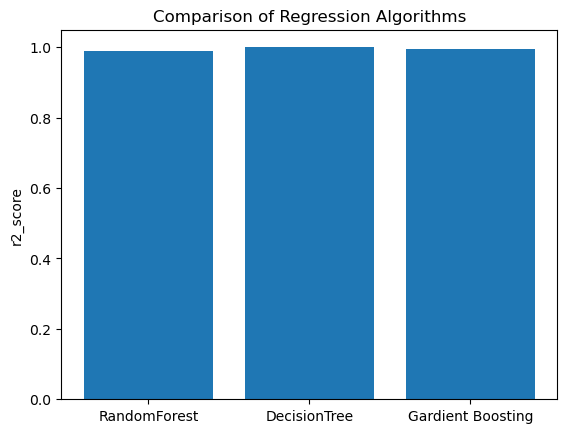

In [62]:
y = np.array([r2_score(y_test,dtr_predictions),r2_score(y_test,clf_predicitions),
           r2_score(y_test,svc_1_predicitions)])
x = ["RandomForest","DecisionTree","Gardient Boosting"]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.ylabel("r2_score")
plt.show()

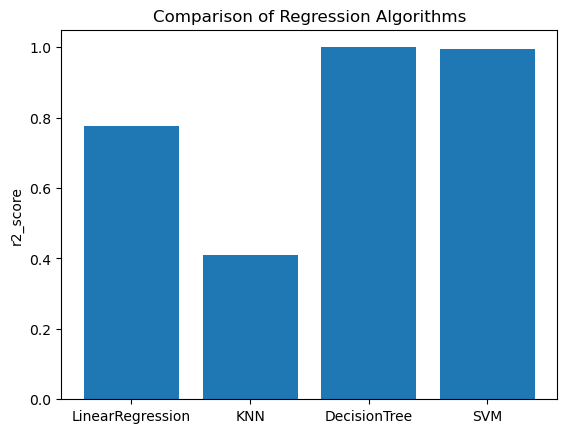

In [63]:
y = np.array([r2_score(y_test,lr_predictions),r2_score(y_test,knn_predictions),r2_score(y_test,rfr_predicitions),
           r2_score(y_test,svc_1_predicitions)])
x = ["LinearRegression","KNN","DecisionTree","SVM"]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.ylabel("r2_score")
plt.show()